해당 내용은 python_selenium_menual related study를 위한 정리본
https://selenium-python.readthedocs.io/getting-started.html

# Selenium 
## 2.1. Simple Usage
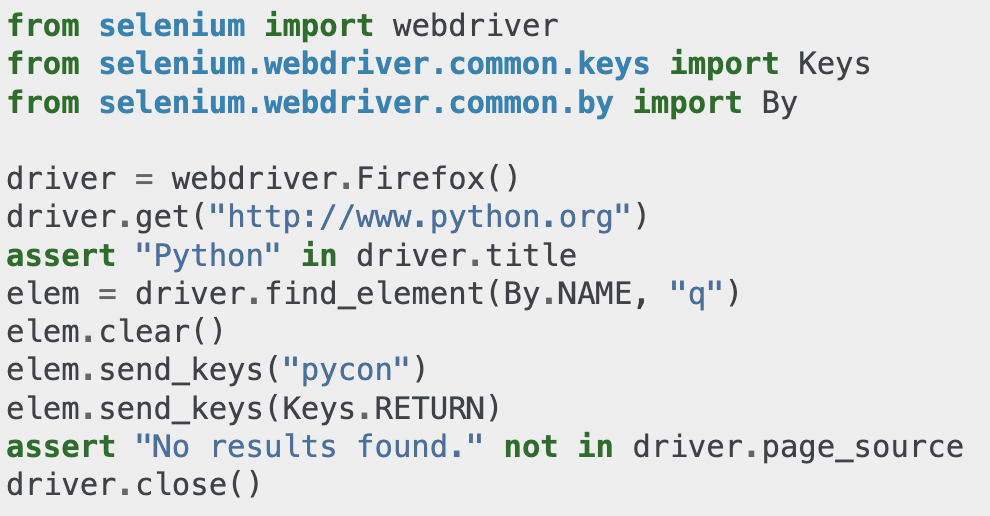

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

# webdriver가 위치한 장소
driver = webdriver.Chrome()
# 접근할 URL
url="http://www.python.org"
driver.get(url)

# 제목(title)에 Python이 있음을 확인하는 코드
assert "Python" in driver.title

# NAME이 "q"인 엘레멘트를 불러와서 elem 변수에 저장
elem = driver.find_element(By.NAME, "q")

# elem에 pycon 입력
elem.send_keys("pycon")

# elem에 모든 내용 제거
elem.clear()


elem.send_keys("pycon")

# Keys.ENTER도 가능
elem.send_keys(Keys.RETURN)

assert "No results found." not in driver.page_source

time.sleep(1)

# 왜 elem을 다시 설정해줘야하지?????????????
elem = driver.find_element(By.NAME, "q")
elem.clear()

time.sleep(1)

elem.send_keys("asdf")

time.sleep(1)

elem.send_keys(Keys.RETURN)

time.sleep(1)

assert "No results found." in driver.page_source

# 크롬 종료
driver.close()

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


## 2.3. Using Selenium to write tests

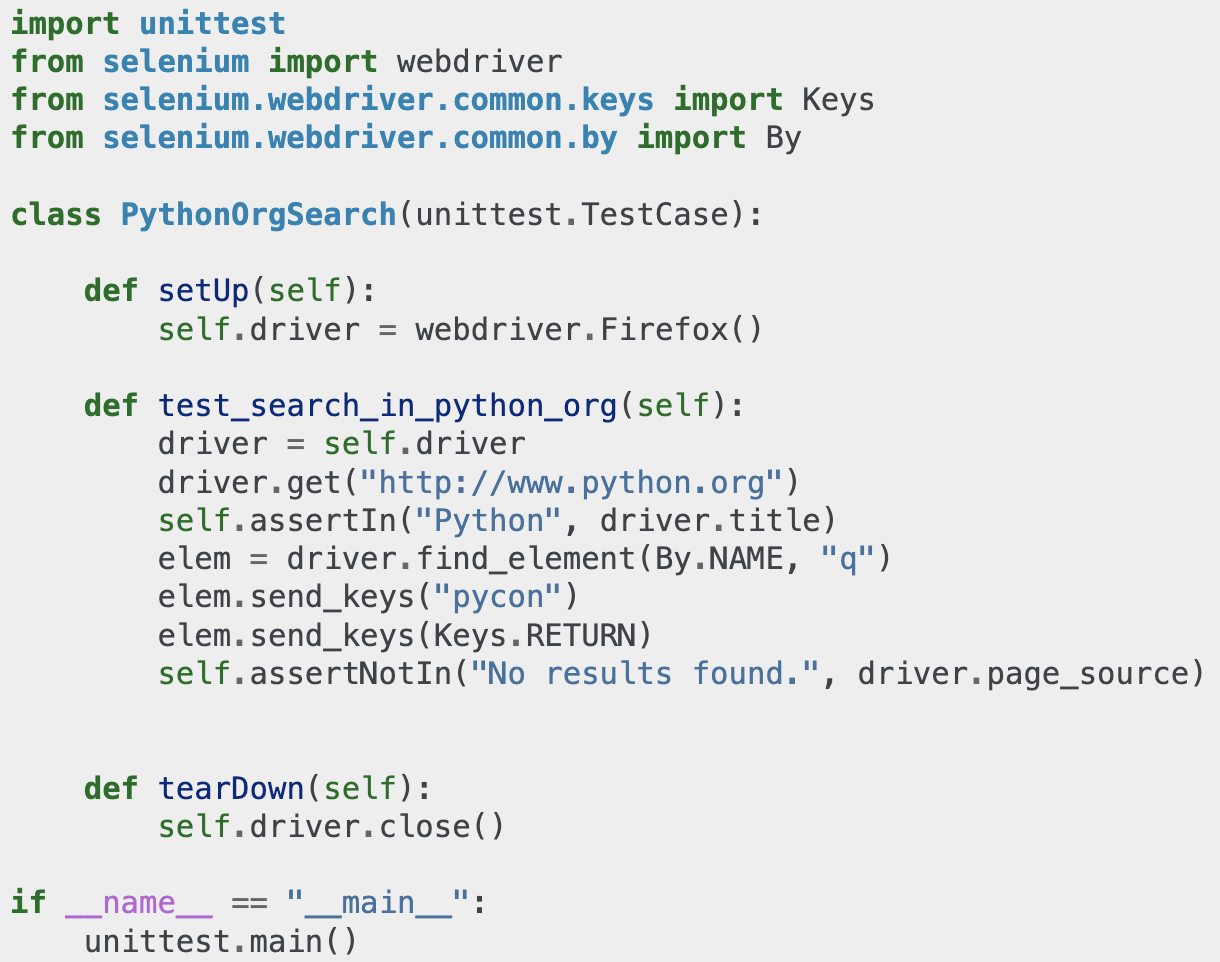

In [1]:
# unittest 모듈은 Java의 JUnit을 기반으로 하는 내장 Python 모듈입니다. 
# 이 모듈은 테스트 케이스를 구성하기 위한 프레임워크를 제공합니다. 
# selenium.webdriver 모듈은 모든 WebDriver 구현을 제공합니다. 
# 현재 지원되는 WebDriver 구현은 Firefox, Chrome, IE 및 Remote입니다. 
# Keys 클래스는 RETURN, F1, ALT 등과 같은 키보드의 키를 제공합니다. 
# By 클래스는 문서 내에서 요소를 찾는 데 사용됩니다.

import unittest
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By


# 테스트 케이스 클래스는 unittest.TestCase에서 상속됩니다. 
# TestCase 클래스에서 상속하는 것은 이것이 테스트 케이스임을 unittest 모듈에 알리는 방법입니다:
class PythonOrgSearch(unittest.TestCase):

    
    # 이 메서드는 이 테스트 케이스 클래스에서 작성하려는 모든 테스트 함수보다 먼저 호출됩니다.
    def setUp(self):
        self.driver = webdriver.Chrome()
    
    
    def test_search_in_python_org(self):
        driver = self.driver
        driver.get("http://www.python.org")
        self.assertIn("Python", driver.title)
        elem = driver.find_element(By.NAME, "q")
        elem.send_keys("pycon")
        elem.send_keys(Keys.RETURN)
        self.assertNotIn("No results found.", driver.page_source)
    
    # tearDown 메소드는 모든 테스트 메소드 후에 호출됩니다. 
    # 모든 정리 작업을 수행하는 곳입니다. 
    # 현재 방법에서는 브라우저 창이 닫힙니다. 
    # 닫기 대신 종료 메서드를 호출할 수도 있습니다. 
    # quit 메소드는 전체 브라우저를 종료하는 반면 close 는 탭을 닫습니다. 
    # 그러나 열려 있는 유일한 탭인 경우 기본적으로 대부분의 브라우저는 완전히 종료됩니다.:
    def tearDown(self):
        self.driver.close()

# 테스트 스위트를 실행하기 위한 일부 상용구 코드입니다.
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    # 만약 주피터 노트가 아니라면, unittest.main()로 사용해도 가능

E
ERROR: test_search_in_python_org (__main__.PythonOrgSearch)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/selenium/webdriver/common/service.py", line 71, in start
    self.process = subprocess.Popen(cmd, env=self.env,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/subprocess.py", line 1847, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
FileNotFoundError: [Errno 2] No such file or directory: 'chromedriver'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/var/folders/yz/nf243ycx6pn_gt0_64_hxwbm0000gn/T/ipykernel_96300/3647001832.py", line 2

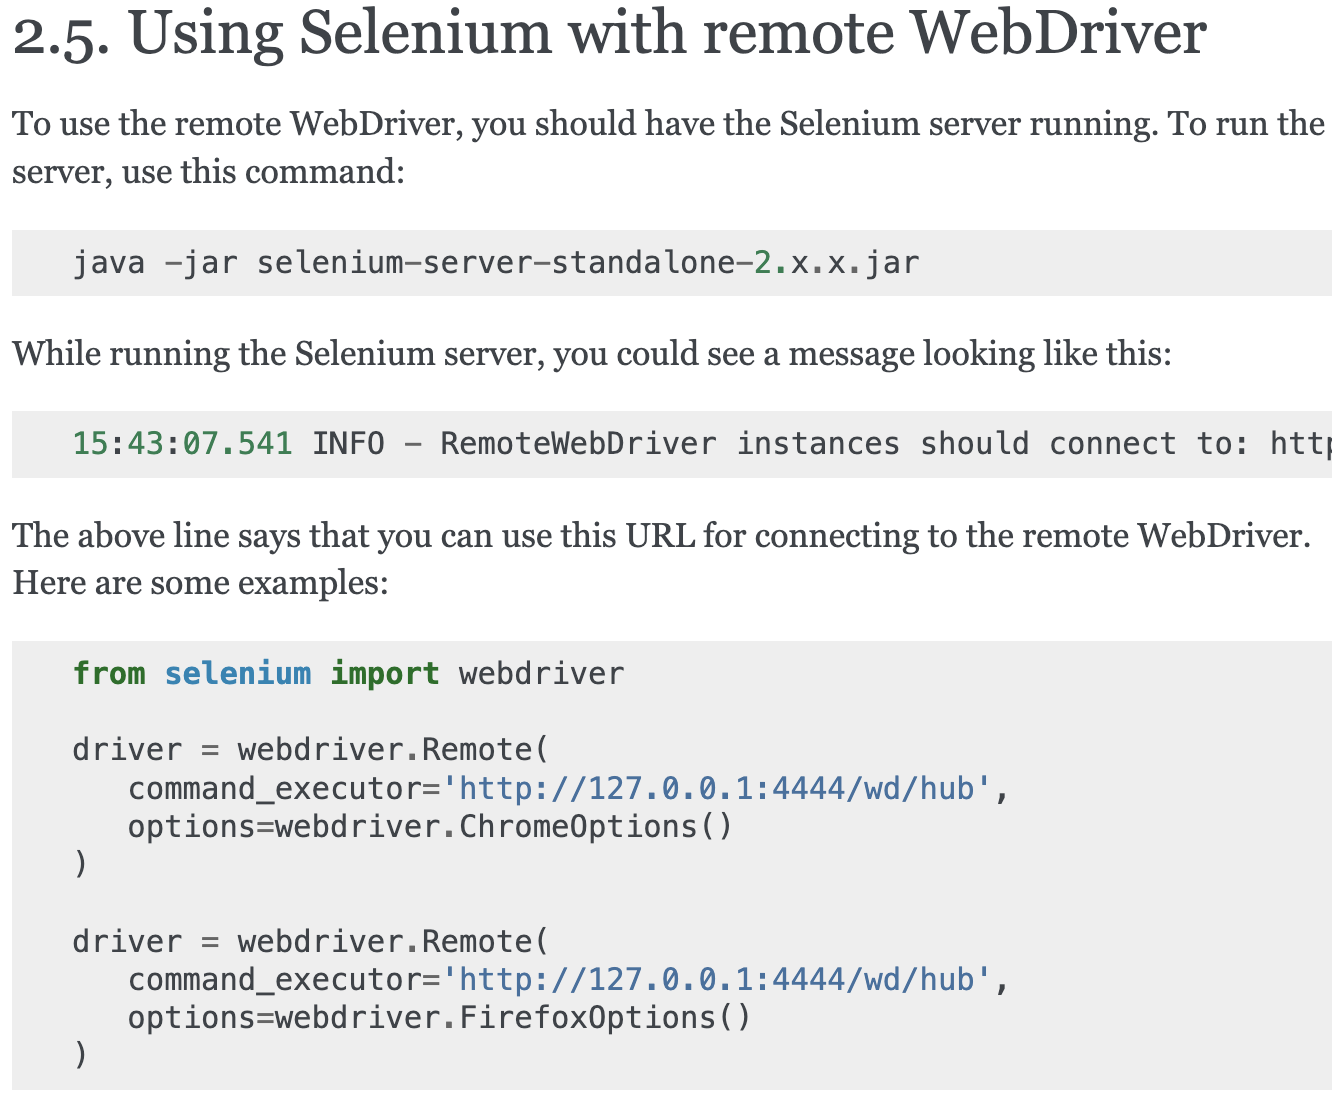
## 해당 기능은 나중에 research 필요
리모트 셀레니움? local에서 직접 실행하는 방식이 아닌건가??????

## 3. Navigating
## 3.1. Interacting with the page

< input type="text" name="passwd" id="passwd-id" >

you could find it using any of:

element = driver.find_element(By.ID, "passwd-id")

element = driver.find_element(By.NAME, "passwd")

element = driver.find_element(By.XPATH, "//input[@id='passwd-id']")

element = driver.find_element(By.CSS_SELECTOR, "input#passwd-id")

텍스트로 링크를 찾을 수도 있지만, 텍스트는 정확히 일치해야 합니다! 
WebDriver에서 XPATH를 사용할 때도 주의해야 합니다. 쿼리와 일치하는 요소가 두 개 이상 있으면 첫 번째 요소만 반환됩니다. 
아무것도 찾을 수 없으면 NoSuchElementException이 발생합니다.

WebDriver는 올바른 작업을 시도하고 의미가 없는 메서드(예: "메타" 태그의 "setSelected()")를 호출하면 예외가 발생합니다.

In [16]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
url="http://www.python.org"
driver.get(url)

"""
<input id="id-search-field" name="q" type="search" role="textbox" class="search-field" placeholder="Search" value="" tabindex="1">
"""

# ID 값으로 찾기
elem = driver.find_element(By.ID, "id-search-field")
time.sleep(1)
elem.send_keys("pycon")
time.sleep(1)
elem.clear()

# NAME 값으로 찾기
elem = driver.find_element(By.NAME, "q")
time.sleep(1)
elem.send_keys("pycon")
time.sleep(1)
elem.clear()

# XPATH 값으로 찾기
elem = driver.find_element(By.XPATH, "//input[@id='id-search-field']")
time.sleep(1)
elem.send_keys("pycon")
time.sleep(1)
elem.clear()

# CSS_SELECTOR 값으로 찾기
elem = driver.find_element(By.CSS_SELECTOR, "input#id-search-field")
time.sleep(1)
elem.send_keys("pycon")
time.sleep(1)
elem.clear()
time.sleep(1)
elem.send_keys(" and some", Keys.ARROW_UP)
time.sleep(3)
elem.clear()


driver.close()


## 3.2. Filling in forms
select tag를 위한 import : Select를 import하면 가능한 것

In [34]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.support.ui import Select

driver = webdriver.Chrome()
url="http://www.homejjang.com/05/select.php"
driver.get(url)


#elem = driver.find_element(By.NAME, "job")
#sel = Select(driver.find_element(By.TAG_NAME, "select"))
select = Select(driver.find_element(By.XPATH, "//select[@name='job']"))
all_selected_options = select.all_selected_options
options = select.options
print(options)


#a = sel.select_by_index(3)
#b = sel.select_by_index(1)
#c = sel.select_by_index(2)
#d = sel.select_by_index(3)
#elem.click()
#a.click()
# Select(driver.find_element(By.TAG_NAME, “select”)).select_by_index(2)
# b = select.select_by_visible_text("GO")
# c = select.select_by_value(value)


[<selenium.webdriver.remote.webelement.WebElement (session="b37bc8654447611d636737f577a3a705", element="e66e741c-3f8c-49e9-97b2-ab21b45b11c9")>, <selenium.webdriver.remote.webelement.WebElement (session="b37bc8654447611d636737f577a3a705", element="db737981-191c-4e46-86c5-77bab406e2ae")>, <selenium.webdriver.remote.webelement.WebElement (session="b37bc8654447611d636737f577a3a705", element="3859fdf3-7893-4f2e-843c-7ef8283b6ce3")>, <selenium.webdriver.remote.webelement.WebElement (session="b37bc8654447611d636737f577a3a705", element="b994a4f3-60a8-4ad2-8191-37088ae587d3")>]


## 3.3. Drag and drop
드래그 앤 드롭을 사용하여 요소를 특정 양만큼 이동하거나 다른 요소로 이동할 수 있습니다.

In [37]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time


driver = webdriver.Chrome()
url="https://www.python.org/"
driver.get(url)

element = driver.find_element(By.NAME, "q")
target = driver.find_elements(By.CSS_SELECTOR, ".tag-wrapper")[2]

from selenium.webdriver import ActionChains
action_chains = ActionChains(driver)
action_chains.drag_and_drop(element, target).click().perform()

## 3.4. Moving between windows and frames¶
여러 탭을 생성하고 이동하고 제거할 수 있습니다.

In [40]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
url="https://www.python.org/"
driver.get(url)


driver.execute_script('window.open("https://naver.com");')
time.sleep(1)

driver.execute_script('window.open("https://daum.net");')
time.sleep(1)

driver.execute_script('window.open("https://google.com");')
time.sleep(1)

driver.switch_to.window(driver.window_handles[3])
time.sleep(1)

driver.switch_to.window(driver.window_handles[2])
time.sleep(1)

driver.switch_to.window(driver.window_handles[1])
time.sleep(1)

driver.switch_to.window(driver.window_handles[0])
time.sleep(1)

print(driver.window_handles)

# 1개의 탭 종료
driver.close()

time.sleep(1)

# 크롬 자체 종료(모든 탭 종료)
driver.quit()

['CDwindow-195EAB3ACFB5FA1DEAAB874BA2EE6F34', 'CDwindow-8631617B13B9F2F6103BF9973C2D528C', 'CDwindow-F64B5C5F1F70DF60059472D6821E9255', 'CDwindow-4E8DCD2CF674C2324C219CCEC6A8DA65']


## 3.5. Popup dialogs
Selenium WebDriver에는 팝업 대화 상자 처리에 대한 지원이 내장되어 있습니다. 
팝업을 여는 작업을 트리거한 후 다음을 사용하여 경고에 액세스할 수 있습니다.

In [44]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
url="https://www.python.org/"
driver.get(url)


time.sleep(3)

alert = driver.switch_to.alert

NoAlertPresentException: Message: no such alert
  (Session info: chrome=107.0.5304.110)
Stacktrace:
0   chromedriver                        0x00000001021f12c8 chromedriver + 4752072
1   chromedriver                        0x0000000102171463 chromedriver + 4228195
2   chromedriver                        0x0000000101dd498a chromedriver + 440714
3   chromedriver                        0x0000000101dc88f6 chromedriver + 391414
4   chromedriver                        0x0000000101deae06 chromedriver + 531974
5   chromedriver                        0x0000000101e32d5b chromedriver + 826715
6   chromedriver                        0x0000000101deab8f chromedriver + 531343
7   chromedriver                        0x0000000101e32b33 chromedriver + 826163
8   chromedriver                        0x0000000101e039fd chromedriver + 633341
9   chromedriver                        0x0000000101e05051 chromedriver + 639057
10  chromedriver                        0x00000001021be30e chromedriver + 4543246
11  chromedriver                        0x00000001021c2a88 chromedriver + 4561544
12  chromedriver                        0x00000001021ca6df chromedriver + 4593375
13  chromedriver                        0x00000001021c38fa chromedriver + 4565242
14  chromedriver                        0x00000001021992cf chromedriver + 4391631
15  chromedriver                        0x00000001021e25b8 chromedriver + 4691384
16  chromedriver                        0x00000001021e2739 chromedriver + 4691769
17  chromedriver                        0x00000001021f881e chromedriver + 4782110
18  libsystem_pthread.dylib             0x00007ff813c934e1 _pthread_start + 125
19  libsystem_pthread.dylib             0x00007ff813c8ef6b thread_start + 15


## 3.6. Navigation: history and location
페이지에서 페이지로 이동했을 경우, history로 이동이 가능

In [46]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
url="https://www.python.org/"
driver.get(url)

elem = driver.find_element(By.NAME, "q")
elem.clear()

time.sleep(1)

elem.send_keys("asdf")

time.sleep(1)

elem.send_keys(Keys.RETURN)

time.sleep(1)

# 뒤로가기
time.sleep(1)
driver.back()

# 앞으로가기
time.sleep(1)
driver.forward()

# 뒤로가기
time.sleep(1)
driver.back()


time.sleep(1)

# 크롬 자체 종료(모든 탭 종료)
driver.quit()

## 3.7. Cookies
자습서의 다음 섹션으로 이동하기 전에 쿠키 사용 방법을 이해하는 데 관심이 있을 수 있습니다. 
우선 쿠키가 유효한 도메인에 있어야 합니다.
쿠키가 무엇이며, 
쿠키로 무엇을 해볼수 있을까???
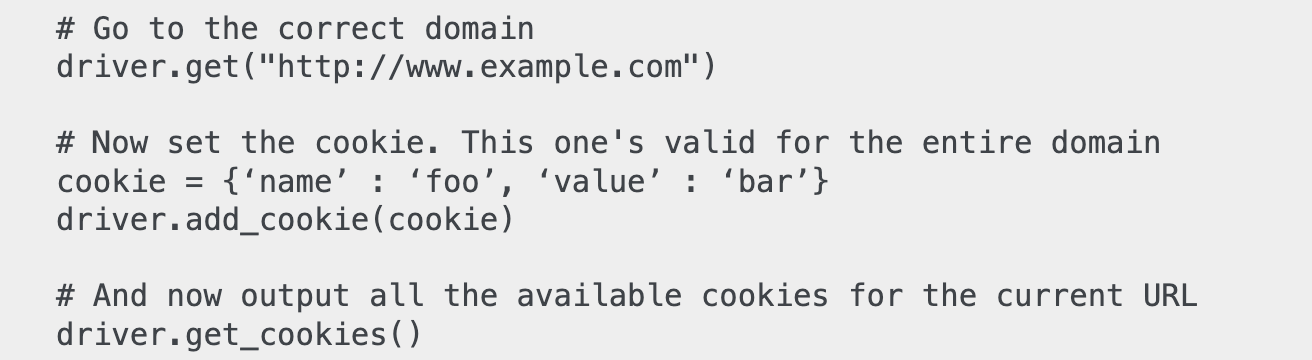